### Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Functions


In [2]:
# Function to remove outliers
def remove_outliers(df, col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [3]:
# Get outliers
def get_outliers(df, col):
    Q1 = np.quantile(df[col], 0.25)
    Q3 = np.quantile(df[col], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

### Import Data


In [4]:
# Load the dataset
path = "ds_salaries.csv"


ds = pd.read_csv(path)

### Explore Data


In [5]:
ds.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [6]:
ds.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [8]:
ds.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [9]:
ds.experience_level.unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

- EN --> Entry-Level
- MI --> Mid-Level
- SE --> Senior
- EX --> Executive-Level


In [10]:
ds.employment_type.unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

- FT --> Full-Time
- CT --> Contract
- PT --> Part-Time
- FL --> Freelancer


In [11]:
ds.work_year.unique()

array([2020, 2021, 2022], dtype=int64)

In [12]:
ds.job_title.value_counts().head(10)

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64

In [13]:
ds.company_size.unique()

array(['L', 'S', 'M'], dtype=object)

In [14]:
ds.remote_ratio.unique()

array([  0,  50, 100], dtype=int64)

## Data cleaning


Some changes to increase the quality of data

- rename (Unnamed:0) --> id
- drop (salary, salary_currency) columns --> because it's not useful and salary_in_usd column to standardize currency


In [15]:
ds.drop(
    columns=[
        "salary",
        "salary_currency",
    ],
    inplace=True,
)

In [16]:
# rename salary_in_usd to salary and Unnamed: 0 to id
ds.rename(columns={"Unnamed: 0": "id", "salary_in_usd": "salary"}, inplace=True)

remote_ratio column

- rename it to work_type
- 0 --> In-Site
- 50 --> Hybrid
- 100 --> Remote


In [17]:
ds.rename(columns={"remote_ratio": "work_type"}, inplace=True)
remote_mapping = {0: "In-Site", 50: "Hybrid", 100: "Remote"}
ds["work_type"] = ds["work_type"].map(remote_mapping)

In [18]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   employee_residence  607 non-null    object
 7   work_type           607 non-null    object
 8   company_location    607 non-null    object
 9   company_size        607 non-null    object
dtypes: int64(3), object(7)
memory usage: 47.6+ KB


In [19]:
# Check for missing values
ds.isnull().sum()

id                    0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
employee_residence    0
work_type             0
company_location      0
company_size          0
dtype: int64

In [20]:
# Check for duplicates
ds.duplicated().sum()

0

##### Check for outliers


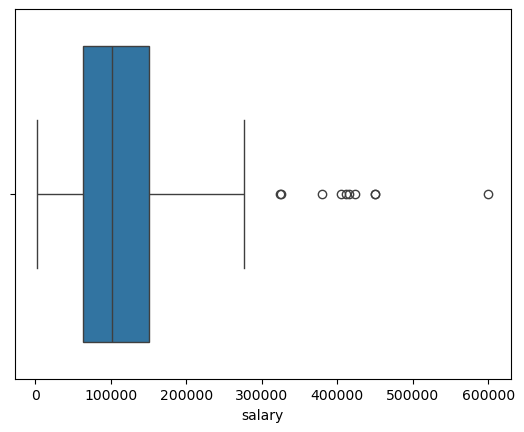

In [21]:
sns.boxplot(x=ds["salary"])
plt.show()

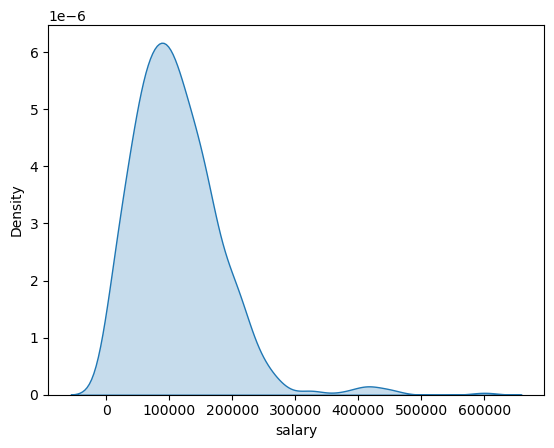

In [22]:
sns.kdeplot(ds["salary"], fill=True)
plt.show()

As there are few outliers in data, so the best option to preserve all data, to seperate data into cleaned_data and outliers.


In [23]:
# outliers
outliers = get_outliers(ds, "salary")
outliers

,id,work_year,experience_level,employment_type,job_title,salary,employee_residence,work_type,company_location,company_size
25,25,2020,EX,FT,Director of Data Science,325000,US,Remote,US,L
33,33,2020,MI,FT,Research Scientist,450000,US,In-Site,US,M
63,63,2020,SE,FT,Data Scientist,412000,US,Remote,US,L
97,97,2021,MI,FT,Financial Data Analyst,450000,US,Remote,US,L
157,157,2021,MI,FT,Applied Machine Learning Scientist,423000,US,Hybrid,US,L
225,225,2021,EX,CT,Principal Data Scientist,416000,US,Remote,US,S
252,252,2021,EX,FT,Principal Data Engineer,600000,US,Remote,US,L
482,482,2022,EX,FT,Data Engineer,324000,US,Remote,US,M
519,519,2022,SE,FT,Applied Data Scientist,380000,US,Remote,US,L
523,523,2022,SE,FT,Data Analytics Lead,405000,US,Remote,US,L


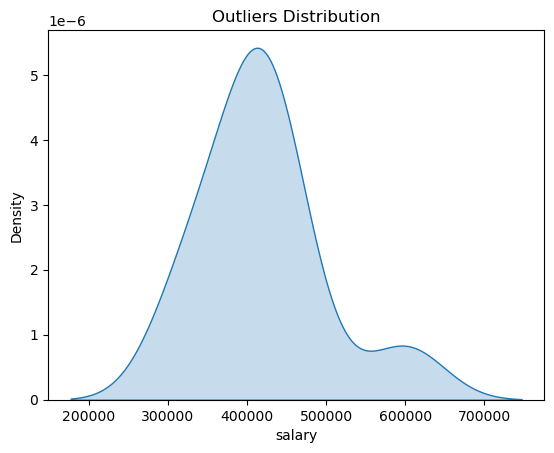

In [24]:
sns.kdeplot(outliers["salary"], fill=True)
plt.title("Outliers Distribution")
plt.show()

In [25]:
# Remove outliers
cleaned_ds = remove_outliers(ds, "salary")
cleaned_ds

,id,work_year,experience_level,employment_type,job_title,salary,employee_residence,work_type,company_location,company_size
0,0,2020,MI,FT,Data Scientist,79833,DE,In-Site,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,JP,In-Site,JP,S
2,2,2020,SE,FT,Big Data Engineer,109024,GB,Hybrid,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,HN,In-Site,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,US,Hybrid,US,L
...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,US,Remote,US,M
603,603,2022,SE,FT,Data Engineer,126000,US,Remote,US,M
604,604,2022,SE,FT,Data Analyst,129000,US,In-Site,US,M
605,605,2022,SE,FT,Data Analyst,150000,US,Remote,US,M


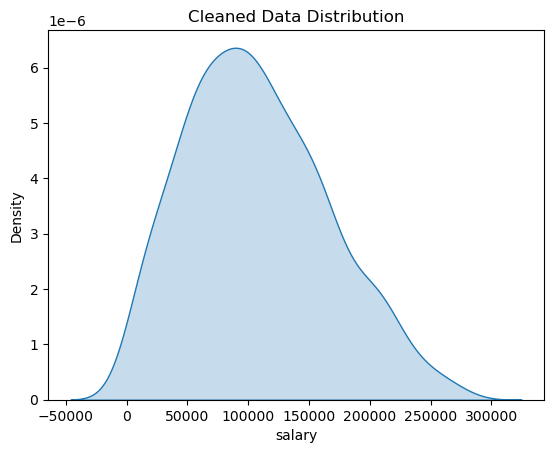

In [26]:
sns.kdeplot(cleaned_ds["salary"], fill=True)
plt.title("Cleaned Data Distribution")
plt.show()

## Data Exploration


#### Categorical Data Overview


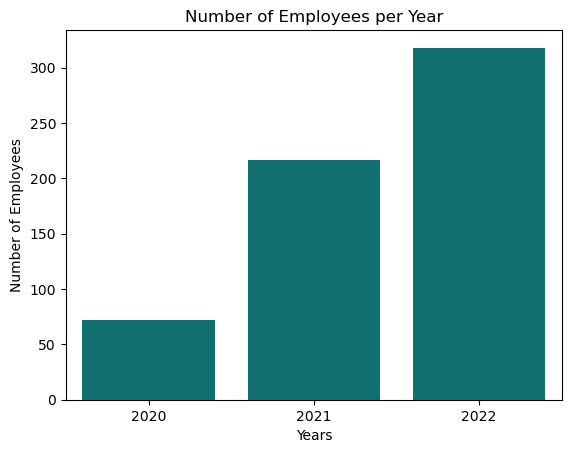

In [27]:
sns.countplot(x=ds["work_year"], color="teal")
plt.title("Number of Employees per Year")
plt.xlabel("Years")
plt.ylabel("Number of Employees")
plt.show()

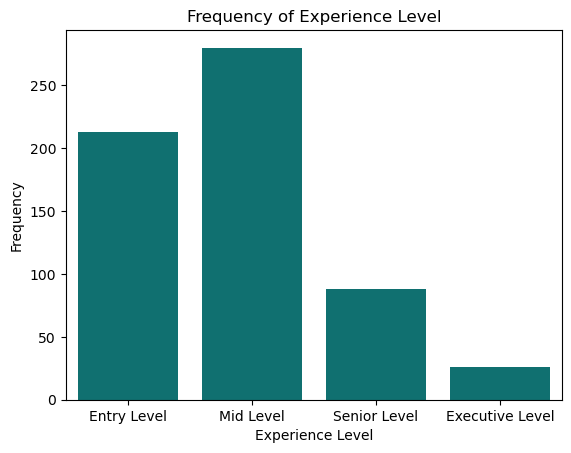

In [28]:
sns.countplot(x=ds.experience_level, color="teal")
plt.title("Frequency of Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Frequency")
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
)
plt.show()

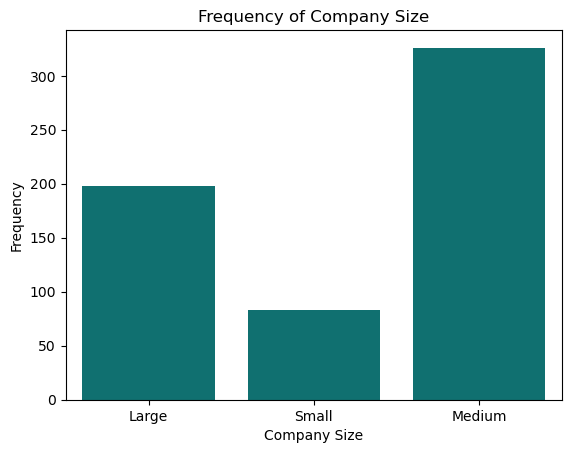

In [29]:
sns.countplot(x=ds.company_size, color="teal")
plt.title("Frequency of Company Size")
plt.xlabel("Company Size")
plt.ylabel("Frequency")
plt.xticks(ticks=["L", "S", "M"], labels=["Large", "Small", "Medium"])
plt.show()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64


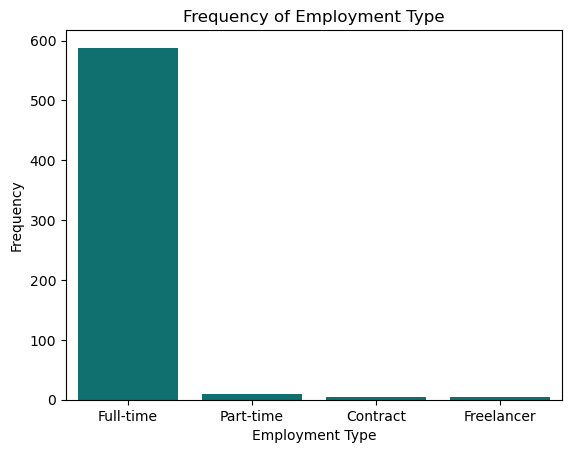

In [30]:
x = ds.employment_type.value_counts()
print(x)
sns.barplot(x=x.index, y=x.values, color="teal")
plt.title("Frequency of Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Frequency")
plt.xticks(
    ticks=[0, 1, 2, 3], labels=["Full-time", "Part-time", "Contract", "Freelancer"]
)
plt.show()

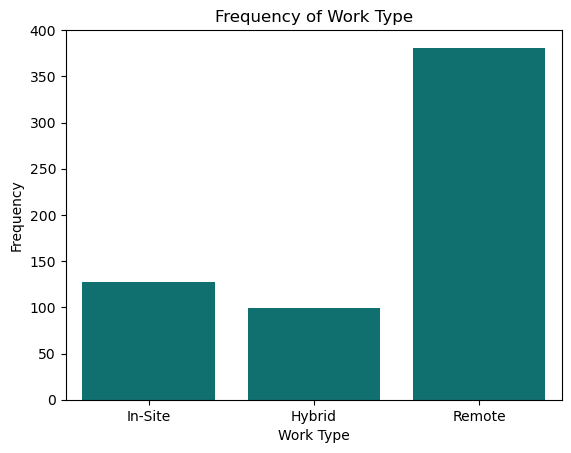

In [31]:
sns.countplot(x=ds.work_type, color="teal")
plt.title("Frequency of Work Type")
plt.xlabel("Work Type")
plt.ylabel("Frequency")
plt.show()

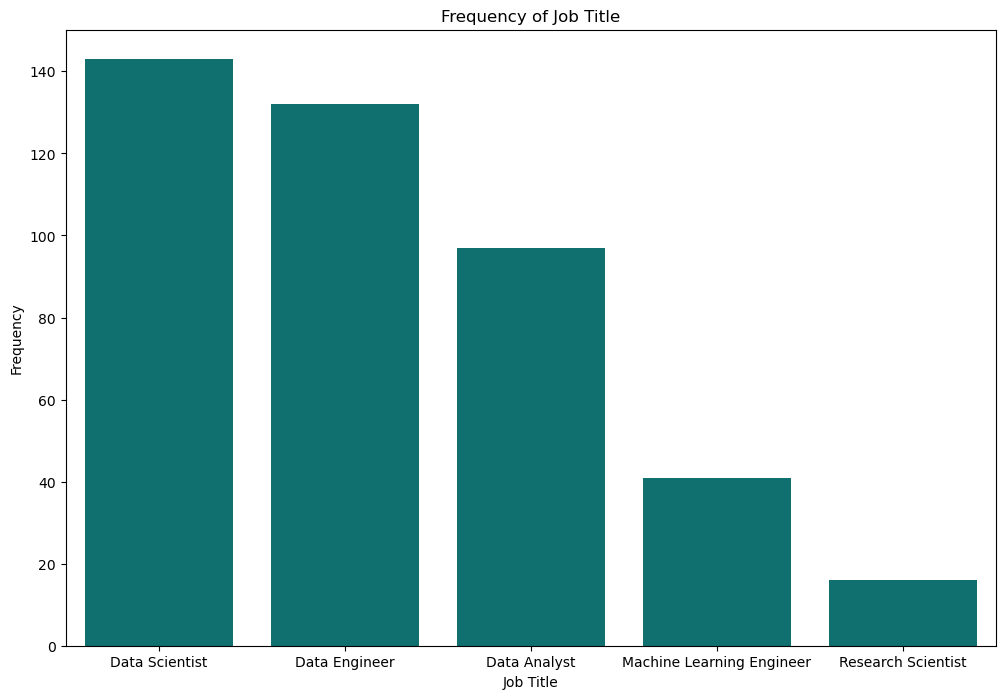

In [32]:
x = ds.job_title.value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 8))
sns.countplot(x=ds.job_title, order=x.index, color="teal")
plt.title("Frequency of Job Title")
plt.xlabel("Job Title")
plt.ylabel("Frequency")
# plt.xticks(rotation=45)
plt.show()

### Analysis of Cleaned Data

This section explores salary trends and distributions after removing outliers (cleaned_ds)  
By analyzing the cleaned dataset, we can identify meaningful insights without extreme values affecting the results.


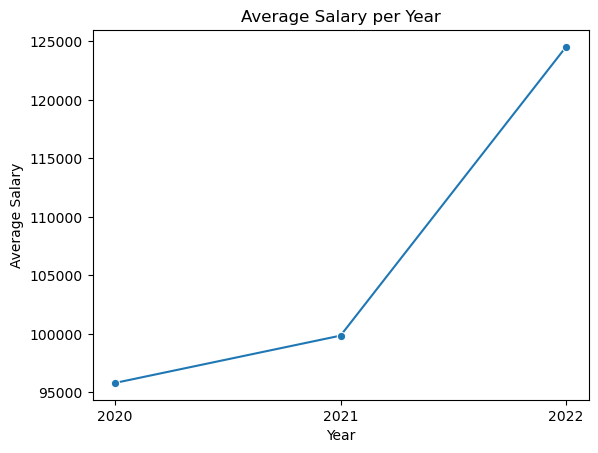

In [33]:
x = ds.groupby("work_year")["salary"].mean()
sns.lineplot(x=x.index, y=x.values, errorbar=("ci", False), marker="o")
plt.xticks(ticks=[2020, 2021, 2022], labels=["2020", "2021", "2022"])
plt.title("Average Salary per Year")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.show()

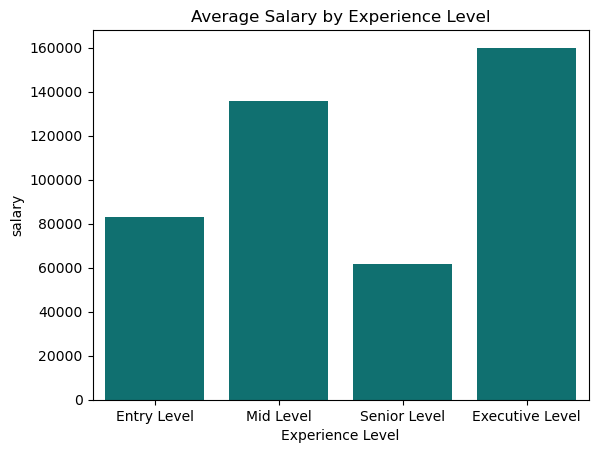

In [34]:
sns.barplot(
    data=cleaned_ds,
    x="experience_level",
    y="salary",
    color="teal",
    errorbar=("ci", False),
)



plt.xlabel("Experience Level")



plt.title("Average Salary by Experience Level")
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
)



plt.show()

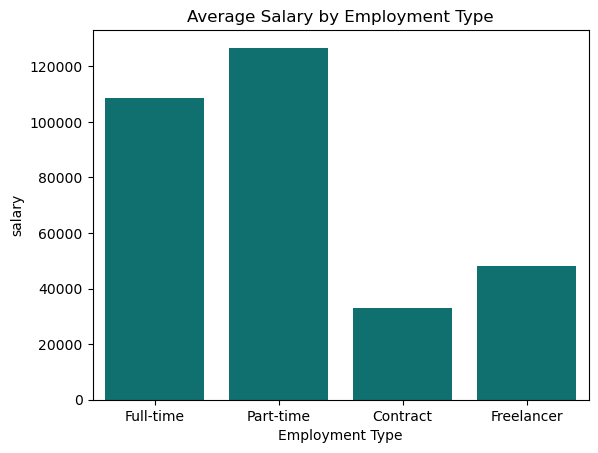

In [35]:
sns.barplot(
    cleaned_ds, x="employment_type", y="salary", color="teal", errorbar=("ci", False)
)



plt.xlabel("Employment Type")



plt.title("Average Salary by Employment Type")
plt.xticks(
    ticks=[0, 1, 2, 3], labels=["Full-time", "Part-time", "Contract", "Freelancer"]
)



plt.show()

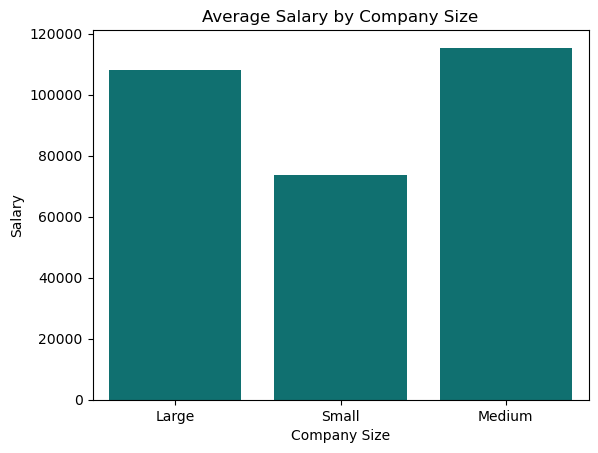

In [36]:
sns.barplot(
    cleaned_ds, x="company_size", y="salary", color="teal", errorbar=("ci", False)
)



plt.xlabel("Company Size")
plt.ylabel("Salary")



plt.title("Average Salary by Company Size")
plt.xticks(ticks=["L", "S", "M"], labels=["Large", "Small", "Medium"])



plt.show()

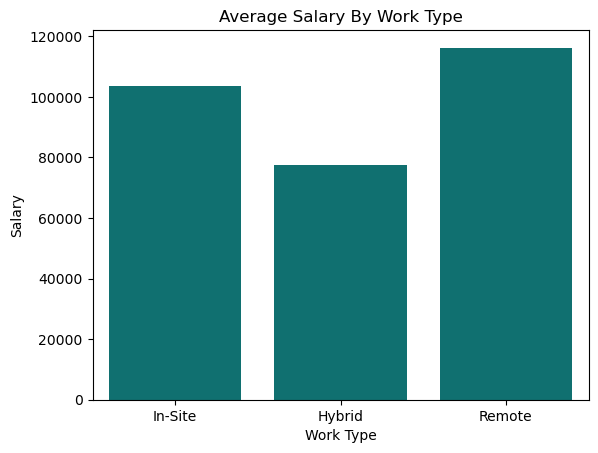

In [37]:
sns.barplot(
    data=cleaned_ds, x="work_type", y="salary", color="teal", errorbar=("ci", False)
)
plt.title("Average Salary By Work Type")
plt.xlabel("Work Type")
plt.ylabel("Salary")
plt.show()

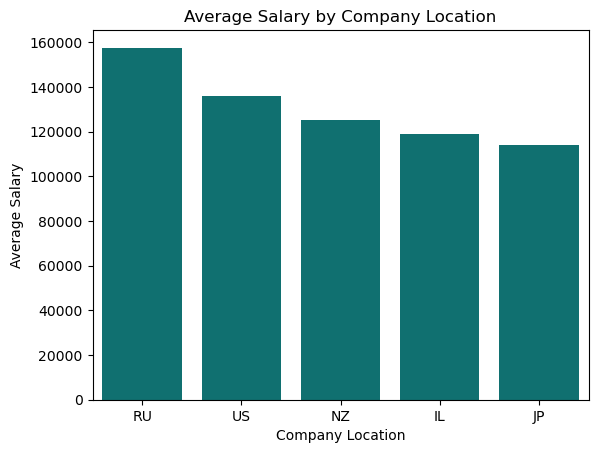

In [38]:
x = (
    cleaned_ds.groupby("company_location")["salary"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
sns.barplot(x=x.index, y=x.values, color="teal")
plt.title("Average Salary by Company Location")
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.show()

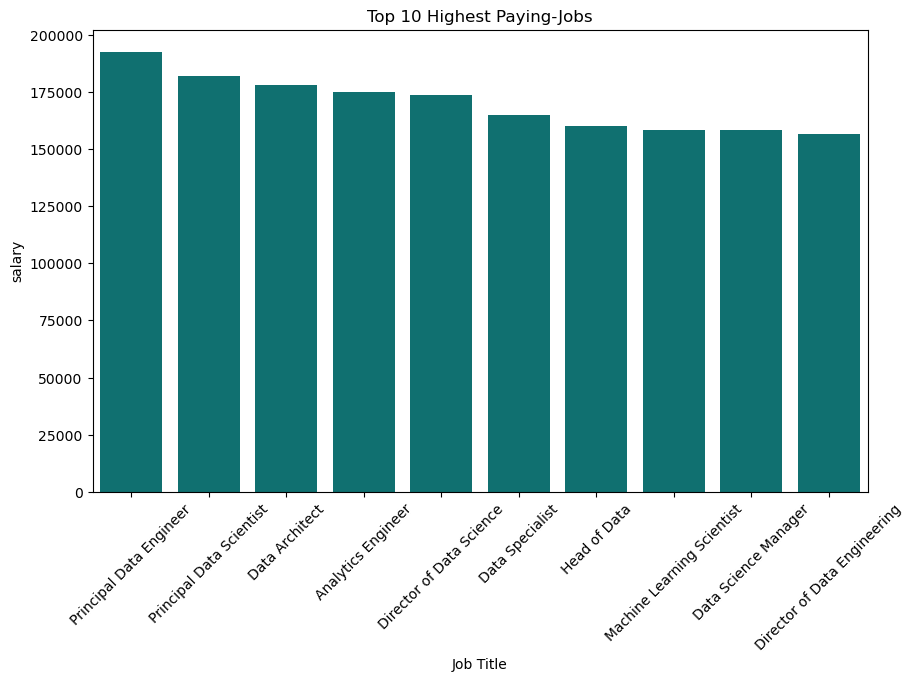

In [39]:
# Top 5 Highest Paying-Jobs
df = pd.DataFrame(
    cleaned_ds.groupby("job_title")["salary"].mean().sort_values(ascending=False)[:10]
)
plt.figure(figsize=(10, 6))
sns.barplot(df, x="job_title", y="salary", color="teal")
plt.xticks(rotation=45)
plt.xlabel("Job Title")
plt.title("Top 10 Highest Paying-Jobs")
plt.show()

#### Analyzing Salary Outliers


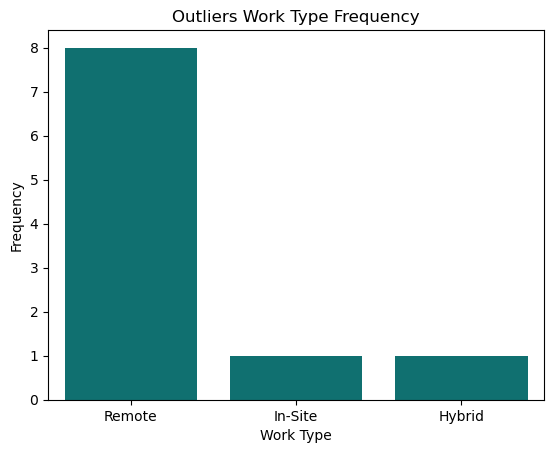

In [40]:
sns.countplot(x=outliers["work_type"], color="teal")
plt.title("Outliers Work Type Frequency")
plt.xlabel("Work Type")
plt.ylabel("Frequency")
plt.show()

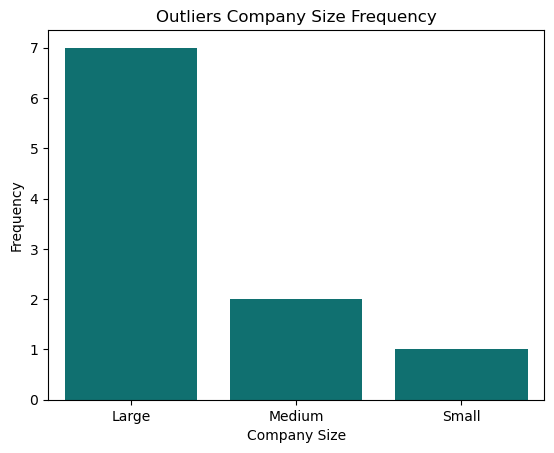

In [41]:
sns.countplot(x=outliers["company_size"], color="teal")
plt.xticks(ticks=["L", "S", "M"], labels=["Large", "Small", "Medium"])
plt.title("Outliers Company Size Frequency")
plt.xlabel("Company Size")
plt.ylabel("Frequency")
plt.show()

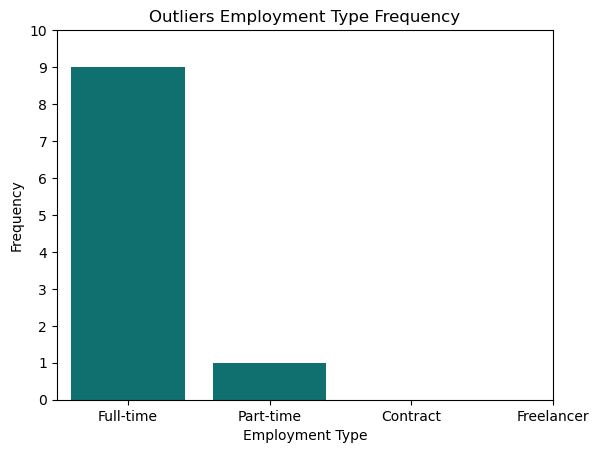

In [42]:
sns.countplot(x=outliers["employment_type"], color="teal")
plt.xticks(
    ticks=[0, 1, 2, 3], labels=["Full-time", "Part-time", "Contract", "Freelancer"]
)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.title("Outliers Employment Type Frequency")
plt.xlabel("Employment Type")
plt.ylabel("Frequency")
plt.show()

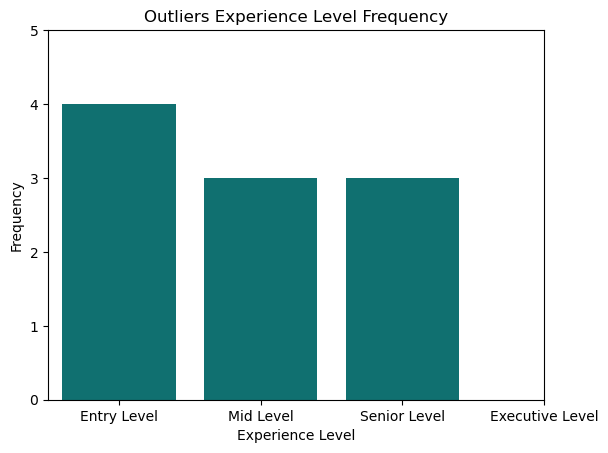

In [43]:
sns.countplot(x=outliers["experience_level"], color="teal")
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
)
plt.yticks(ticks=[0, 1, 2, 3, 4, 5])
plt.title("Outliers Experience Level Frequency")
plt.xlabel("Experience Level")
plt.ylabel("Frequency")
plt.show()

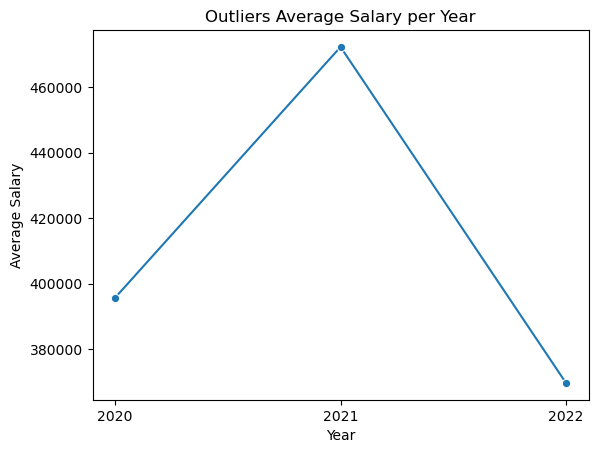

In [44]:
x = outliers.groupby("work_year")["salary"].mean()
sns.lineplot(x=x.index, y=x.values, errorbar=("ci", False), marker="o")
plt.xticks(ticks=[2020, 2021, 2022], labels=["2020", "2021", "2022"])
plt.title("Outliers Average Salary per Year")
plt.xlabel("Year")
plt.ylabel("Average Salary")
plt.show()

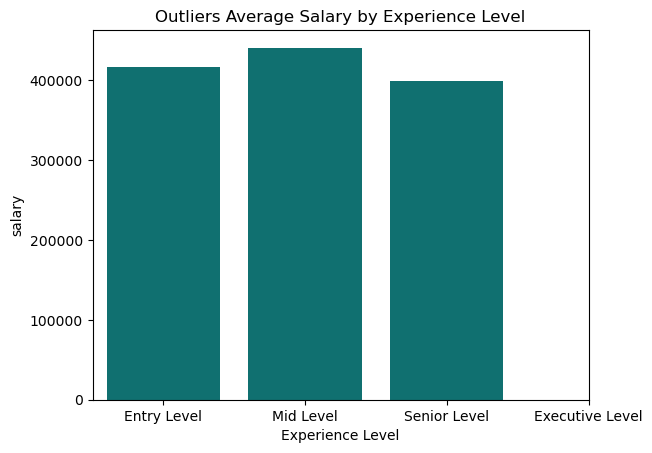

In [45]:
sns.barplot(
    data=outliers,
    x="experience_level",
    y="salary",
    color="teal",
    errorbar=("ci", False),
)

plt.xlabel("Experience Level")

plt.title("Outliers Average Salary by Experience Level")
plt.xticks(
    ticks=[0, 1, 2, 3],
    labels=["Entry Level", "Mid Level", "Senior Level", "Executive Level"],
)

plt.show()

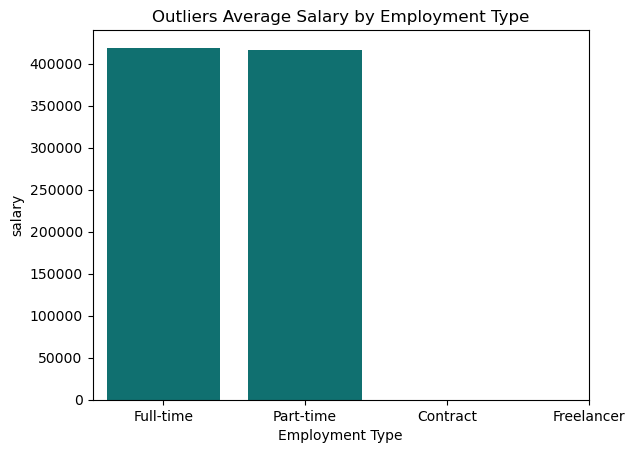

In [46]:
sns.barplot(
    outliers, x="employment_type", y="salary", color="teal", errorbar=("ci", False)
)

plt.xlabel("Employment Type")

plt.title("Outliers Average Salary by Employment Type")
plt.xticks(
    ticks=[0, 1, 2, 3], labels=["Full-time", "Part-time", "Contract", "Freelancer"]
)

plt.show()

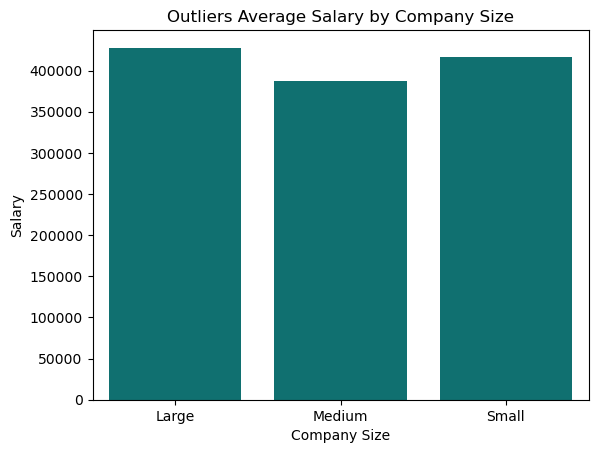

In [47]:
sns.barplot(
    outliers, x="company_size", y="salary", color="teal", errorbar=("ci", False)
)

plt.xlabel("Company Size")
plt.ylabel("Salary")

plt.title("Outliers Average Salary by Company Size")
plt.xticks(ticks=["L", "S", "M"], labels=["Large", "Small", "Medium"])

plt.show()

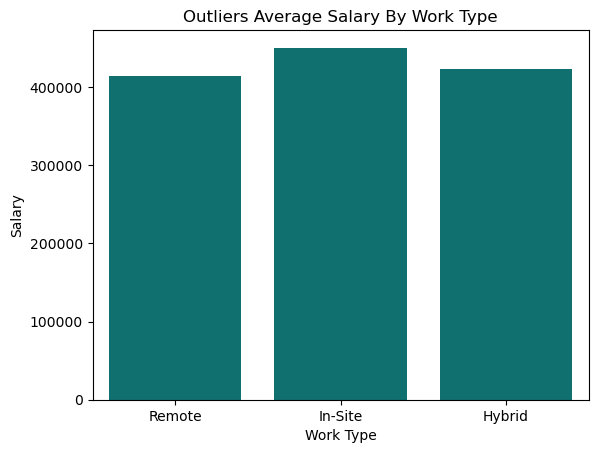

In [48]:
sns.barplot(
    data=outliers, x="work_type", y="salary", color="teal", errorbar=("ci", False)
)
plt.title("Outliers Average Salary By Work Type")
plt.xlabel("Work Type")
plt.ylabel("Salary")
plt.show()

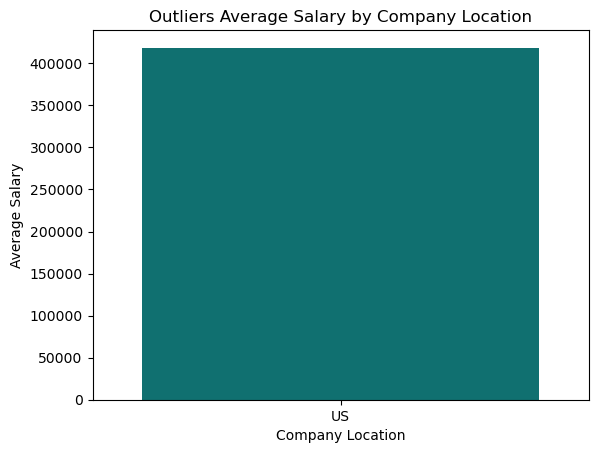

In [49]:
x = (
    outliers.groupby("company_location")["salary"]
    .mean()
    .sort_values(ascending=False)
    .head(5)
)
sns.barplot(x=x.index, y=x.values, color="teal")
plt.title("Outliers Average Salary by Company Location")
plt.xlabel("Company Location")
plt.ylabel("Average Salary")
plt.show()

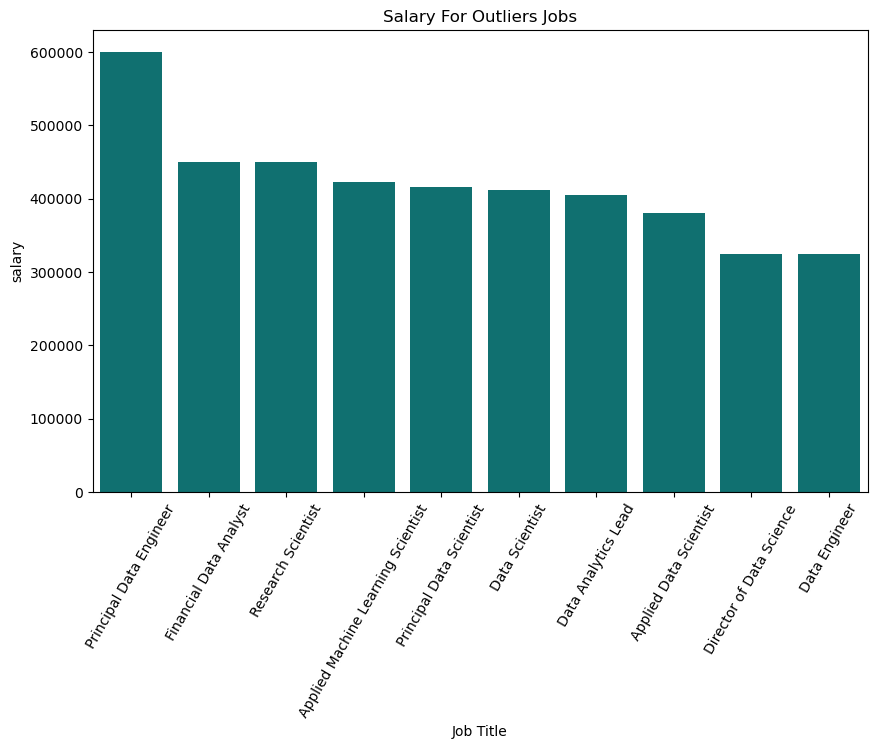

In [50]:
# Top 5 Highest Paying-Jobs
df = pd.DataFrame(
    outliers.groupby("job_title")["salary"].mean().sort_values(ascending=False)
)
plt.figure(figsize=(10, 6))
sns.barplot(df, x="job_title", y="salary", color="teal")
plt.xticks(rotation=60)
plt.xlabel("Job Title")
plt.title("Salary For Outliers Jobs")
plt.show()